In [17]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline

(490, 510)


(array([  0.7758288 ,   7.56387762,  49.06347997,  35.63244584,
         43.2484919 ,  24.23152756,  23.78387851,  40.28638434]),
 array([ 86.33373555,  98.14686731]))

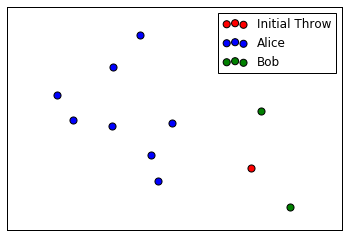

In [61]:
def billiards(n=10,plot=True):

    x1 = st.uniform.rvs(0,100) # choose a random initial position for
    y1 = st.uniform.rvs(0,80) # choosing a y value for funsies, doesn't affect score of game
    x= st.uniform.rvs(0,100,n) # Randomly distributing n throws
    y= st.uniform.rvs(0,80,n) # random y for plotting
    
    A = x[x<x1] # array of throws left of initial throws
    B = x[x>x1] # array of throws right of initial throws
    
    if plot: 
        plt.scatter(x1,y1,s=50,c='r',label="Initial Throw")
        
        plt.scatter(A,y[x<x1],s=50,c='b',label="Alice")
        plt.scatter(B,y[x>x1],s=50,c='g',label="Bob")
        plt.legend()
        plt.xticks([])
        plt.yticks([])
        
    return A,B # Returns arrays A and B containing x locations of those throws

Awins = 0
Bwins = 0
for i in range(1000):
    A,B = billiards(11,plot=False)
    if len(A)>len(B):
        Awins += 1
    else:
        Bwins += 1
        
print(Awins,Bwins)
billiards() # Example situation

Want to figure out the probability that Bob will win, given that Alice has 5, and Bob has 3.

Frequentist approach:
Bob needs to win 3 times in a row, every throw has an equal chance of 3/8 (based on what's happened so far). ${(3/8)*(3/8)*(3/8) = 27/512 = 5.3\%}$ chance 


But suppose we have prior knowledge that the initial throw is exactly in the center. 
The chance of Bob winning becoms $ 1/2*1/2*1/2 = 1/8 = 12.5\% $

The chance of this situation arising is the probability of the observed data arising:
$ P(A)^5 * P(B)^3 $

$ 1/2^5*1/2^3 = .39\%$

Not a large possibility, but nonzero. The frequentist approach ignores all other starting positions in favor of the most likely starting position.

Bayesian approach: 
The probability of Bob winning is actually dependent on the initial throw, but we don't know that, so we need to figure out the probability that the data would be what it is given all possible initial throws. We need to integrate over all possible values.



Everything is based on the initial throw, which we don't know. But we do know how likely it is to be at any point, i.e. we know the probability distribution function (PDF). In this case, the PDF is uniform, it's equally likely to be anywhere between 0 and 100% across the table.

We also need to account for the likelihood of any given initial throw based on the data we have. To figure this out for all values, we'll need to make use of Bayes' theorem.


$P(B|D) = \int P(B|p,D)P(p|D) dp $

Bayes' Theorem:

$ P(p|D) = \frac{P(D|p)P(p)}{P(D)} $

Where the probability of the data given an initial throw is the product of probabilities that would lead to the data. I.e., in this situation it's $P(A)^5*P(B)^3$, or defining p as the initial location, P(A) is simply p, and P(B) is 1-p so $p^5*(1-p)^5$.

$ P(B|D) = \int \frac{P(B|p,D)P(D|p)P(p)}{P(D)}$

In practice, the denominator is the normalization factor and can be calculated later. The challenge is to calculate the numerator.

P(p) is the prior, the distribution of the probability of the initial throw. We make a guess as to what this looks like. In this case, we believe any point has an equal probability.

P(B|p,D)P(D|p) is the likelihood. It takes into account the probability of getting the data given the initial throw and the probability that Bob will win, dependent on the initial throw.

P(D) is the probability of the data, which is the probability of the data given the initial throw, multiplied by the probability of the initial throw, $P(D) = P(D|p)P(p)$

$ P(B|D) =  \frac{\int P(B|p,D)P(D|p)P(p)dp}{\int P(D|p)P(p)dp}$

Finally, the P(p) for a uniform distribution is constant, though in other situations it would need to be considered numerically.

$ P(B|D) =  \frac{\int_0^1 P(B|p,D)P(D|p)dp}{\int_0^1 P(D|p)dp}$

$ P(B|D) =  \frac{\int_0^1 (1-p)^3p^5(1-p)^3 dp}{\int_0^1 (1-p)^3p^5dp}=\frac{\int_0^1 (1-p)^6p^5 dp}{\int_0^1 (1-p)^3p^5dp}$


In [62]:
Pxi = xi/100    # Pxi is the initial throw, it is the probability that any random throw 
                # will land to the left of it. This is the prior, that is, the probability that a 
                # given xi is chosen.
        
Pdb = Pxi**3   # The probability that Bob gets 3 straight points based on the initial throw position
                
Pd = Pxi**3*(1-Pxi)**5 # The probability of the actual data given the initial throw



NameError: name 'xi' is not defined